## Homework 2 - Josephine_He - 12/2021

In [1]:
import numpy as np
import pandas as pd
pd.set_option('precision', 3)
import requests
import matplotlib.pyplot as plt

%matplotlib inline

### Get the time series for the following cryptocurrencies from cryptowat.ch starting from 2021-11-22, hourly data 

In [2]:
def get_data(token):
    if token == 'FLOW':
            res = requests.get(
                f'https://api.cryptowat.ch/markets/kraken/flowusd/ohlc',
                params={
                    'periods': '3600',
                    'after': str(int(pd.Timestamp('2021-11-22').timestamp()))})
    else:
        res = requests.get(
            f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
            params={
                'periods': '3600',
                'after': str(int(pd.Timestamp('2021-11-22').timestamp()))})

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [3]:
# Check 'FLOW' availability on exchange
try:
    res = requests.get(
        f'https://api.cryptowat.ch/markets/kraken/flowusd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )
except SSLError:
    print('untrusted SSL certificate')
else:
    df_flow = pd.DataFrame(
    res.json()['result']['3600'],
    columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df_flow['ts'] = pd.to_datetime(df_flow.ts, unit='s')
    df_flow['token'] = 'FLOW'
    
df_flow.head(3)

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,13.887,14.169,13.887,14.150,23261.381,327475.507,FLOW
1,2021-11-22 01:00:00,14.053,14.453,13.543,13.621,29108.789,411767.484,FLOW
2,2021-11-22 02:00:00,13.534,13.862,13.387,13.753,24737.689,338660.038,FLOW


In [4]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [5]:
dfs = [(get_data(token)) for token in tokens]

In [6]:
print("lengh of dfs: ", len(dfs))
dfs[-1]

lengh of dfs:  5


,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,13.887,14.169,13.887,14.150,23261.381,327475.507,FLOW
1,2021-11-22 01:00:00,14.053,14.453,13.543,13.621,29108.789,411767.484,FLOW
2,2021-11-22 02:00:00,13.534,13.862,13.387,13.753,24737.689,338660.038,FLOW
3,2021-11-22 03:00:00,13.753,13.813,13.435,13.652,10224.587,139852.146,FLOW
4,2021-11-22 04:00:00,13.652,13.652,13.382,13.581,5998.121,81263.038,FLOW
...,...,...,...,...,...,...,...,...
578,2021-12-16 02:00:00,8.936,8.936,8.865,8.885,639.005,5674.135,FLOW
579,2021-12-16 03:00:00,8.888,8.888,8.846,8.877,2723.394,24154.555,FLOW
580,2021-12-16 04:00:00,8.879,8.879,8.840,8.840,975.853,8645.222,FLOW
581,2021-12-16 05:00:00,8.854,8.854,8.822,8.833,367.502,3245.848,FLOW


In [7]:
df_base = pd.concat(get_data(token) for token in tokens)

In [8]:
print("df_base shape: ", df_base.shape)
print("df_base size: ", df_base.size)
df_base.head()

df_base shape:  (2915, 8)
df_base size:  23320


,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.563,3.123e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946,3.575e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725,3.896e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.900,3.882e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.547,3.315e+07,ETH


### Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [9]:
df_base.groupby('token')

In [10]:
# check with len function
print("number of groups:",len(df_base.groupby('token')))
print("groups summary:", df_base.groupby('token').size())

number of groups: 5
groups summary: token
AVAX    583
ETH     583
FLOW    583
SOL     583
USDT    583
dtype: int64


In [11]:
df_volumn_sum = df_base.groupby('token')['volumeUSD'].sum().to_frame().sort_values('volumeUSD', ascending = False).rename(columns = {'volumeUSD':'volumn_sumUSD'})
df_volumn_sum

,volumn_sumUSD
token,
ETH,2.286e+10
SOL,7.485e+09
AVAX,3.824e+09
USDT,2.086e+09
FLOW,9.082e+07


### Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)

In [12]:
df_base.loc[df_base['token'] == 'ETH'].head(3)

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.563,3.123e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946,3.575e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725,3.896e+07,ETH


In [13]:
df_base[df_base['token'].isin(['ETH','SOL'])]  # df_base[(df_base['open'] > 4200) & (df_base['open'] < 4250)] 

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.563,3.123e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946,3.575e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725,3.896e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.900,3.882e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.547,3.315e+07,ETH
...,...,...,...,...,...,...,...,...
578,2021-12-16 02:00:00,179.47,179.97,177.43,178.32,58914.385,1.051e+07,SOL
579,2021-12-16 03:00:00,178.33,178.67,176.54,177.81,59905.541,1.065e+07,SOL
580,2021-12-16 04:00:00,177.76,179.38,176.67,178.82,43942.166,7.814e+06,SOL
581,2021-12-16 05:00:00,178.90,179.35,176.46,176.98,51880.943,9.210e+06,SOL


In [14]:
df_eth_sol = pd.merge(
    dfs[0][['ts','close']].rename(columns={'close':f'close_{tokens[0]}'}),
    dfs[1][['ts','close']].rename(columns={'close':f'close_{tokens[1]}'}),
    on = 'ts',
    how = 'inner')

In [15]:
df_eth_sol['close_price_ratio'] = df_eth_sol['close_ETH']/(df_eth_sol['close_SOL']+0.001)

In [16]:
df_eth_sol.set_index('ts', inplace = True) # df.index.name can change index name

### Change the name of the `volume` and `volumeUSD` columns to volumeBase and volumeTerm

In [17]:
df_base.head()

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.563,3.123e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946,3.575e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725,3.896e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.900,3.882e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.547,3.315e+07,ETH


In [18]:
df_base.rename(columns=
               {'volume':'volumeBase','volumeUSD':'volumnTerm'}, inplace = True)

In [19]:
df_base.head()

,ts,open,high,low,close,volumeBase,volumnTerm,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.563,3.123e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946,3.575e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725,3.896e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.900,3.882e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.547,3.315e+07,ETH


### Create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [20]:
df_price_comp = df_base.set_index('ts')

In [21]:
df_price_comp.sort_index()[['close','token']]

,close,token
ts,,
2021-11-22 00:00:00,4262.990,ETH
2021-11-22 00:00:00,1.001,USDT
2021-11-22 00:00:00,14.150,FLOW
2021-11-22 00:00:00,230.785,SOL
2021-11-22 00:00:00,128.670,AVAX
...,...,...
2021-12-16 06:00:00,4013.250,ETH
2021-12-16 06:00:00,1.000,USDT
2021-12-16 06:00:00,176.680,SOL


In [22]:
close_comp = df_base[['ts','close','token']].pivot(index='ts',columns ='token',values='close')

In [23]:
close_comp

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,128.67,4262.99,14.150,230.785,1.001
2021-11-22 01:00:00,134.85,4234.37,13.621,226.000,1.001
2021-11-22 02:00:00,132.54,4217.89,13.753,227.037,1.001
2021-11-22 03:00:00,133.38,4193.47,13.652,223.117,1.001
2021-11-22 04:00:00,136.29,4168.35,13.581,220.652,1.001
...,...,...,...,...,...
2021-12-16 02:00:00,104.69,4052.17,8.885,178.320,1.001
2021-12-16 03:00:00,105.22,4032.70,8.877,177.810,1.000
2021-12-16 04:00:00,105.15,4020.42,8.840,178.820,1.000


### Calculate the hour by hour log return of the close price of each token (return is calculated by np.log(price_t / price_{t-1}))

In [24]:
log_return = close_comp.apply(lambda x: np.log(x/x.shift(1)), axis = 0)

In [25]:
log_return.head()

token,AVAX,ETH,FLOW,SOL,USDT
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,0.047,-0.007,-0.038,-0.021,9.988e-05
2021-11-22 02:00:00,-0.017,-0.004,0.010,0.005,-9.988e-05
2021-11-22 03:00:00,0.006,-0.006,-0.007,-0.017,-9.989e-05
2021-11-22 04:00:00,0.022,-0.006,-0.005,-0.011,-1.998e-04


### [Stretch] calculate the correlation of the tokens using the table above

In [26]:
log_return.corr()

token,AVAX,ETH,FLOW,SOL,USDT
token,,,,,
AVAX,1.000,0.646,0.397,0.630,-0.009
ETH,0.646,1.000,0.575,0.749,-0.110
FLOW,0.397,0.575,1.000,0.467,-0.188
SOL,0.630,0.749,0.467,1.000,0.099
USDT,-0.009,-0.110,-0.188,0.099,1.000


### [Stretch] visualize the correlation in a matplpotlib plot

<AxesSubplot:xlabel='token'>

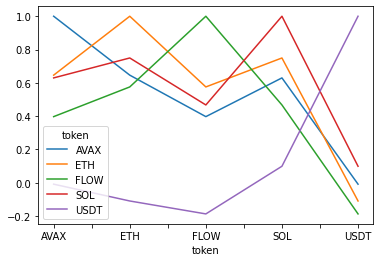

In [29]:
log_return.corr().plot()

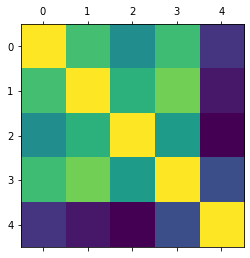

In [30]:
plt.matshow(log_return.corr())
plt.show()

In [31]:
pd.reset_option